<a href="https://colab.research.google.com/github/mari-rufino-g/Vereadores_Brasil/blob/main/DadosEleicoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Instalando as bibliotecas e importando arquivos

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 19.1MB 1.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 6.6MB 22.0MB/s 
     |████████████████████████████████| 15.4MB 197kB/s 


In [ ]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
pasta = '/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020'
arquivo_resultado_2020 = '/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/20_votacao_candidato_munzona_2020_BRASIL.csv'
arquivo_resultado_2016 = '/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/16_votacao_candidato_munzona_2016_BRASIL.csv'
arquivo_municipios_2016 = '/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/BRMUE250GC_SIR.shp'
ibge = 'https://github.com/mari-rufino-g/vereadores2020/blob/main/tabela3175.xlsx?raw=true'

In [ ]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [ ]:
#importando arquivos
dados_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/16_votacao_candidato_munzona_2016_BRASIL.csv', sep = ';', encoding = 'ISO-8859-1')
dados_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/20_votacao_candidato_munzona_2020_BRASIL.csv', sep = ';', encoding = 'ISO-8859-1')
ibge = 'https://github.com/mari-rufino-g/vereadores2020/blob/main/tabela3175.xlsx?raw=true'
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/BR_Municipios_2019.shp'

In [ ]:
dados_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983205 entries, 0 to 983204
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                983205 non-null  object
 1   HH_GERACAO                983205 non-null  object
 2   ANO_ELEICAO               983205 non-null  int64 
 3   CD_TIPO_ELEICAO           983205 non-null  int64 
 4   NM_TIPO_ELEICAO           983205 non-null  object
 5   NR_TURNO                  983205 non-null  int64 
 6   CD_ELEICAO                983205 non-null  int64 
 7   DS_ELEICAO                983205 non-null  object
 8   DT_ELEICAO                983205 non-null  object
 9   TP_ABRANGENCIA            983205 non-null  object
 10  SG_UF                     983205 non-null  object
 11  SG_UE                     983205 non-null  int64 
 12  NM_UE                     983205 non-null  object
 13  CD_MUNICIPIO              983205 non-null  int64 
 14  NM_M

In [ ]:
dados_2016.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,11,Prefeito,120000004280,45,GERSON PRATA JUNIOR,GERSON PRATA,#NULO#,12,APTO,2,DEFERIDO,Coligação,45,PSDB,Partido da Social Democracia Brasileira,120000000293,UNIDOS POR MIRANDA,PSL / PR / DEM / PRP / PSDB / PV,4,NÃO ELEITO,N,5347
1,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000007411,33111,ROSANA CANALE BARBOSA ANTONIO,ROSANA TERENA,#NULO#,12,APTO,2,DEFERIDO,Coligação,33,PMN,Partido da Mobilização Nacional,120000000488,UNIÃO POR MIRANDA II,PHS / PMN,4,NÃO ELEITO,N,12
2,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000007399,31333,NATALICIO SALVADOR,PASTOR MAGRINHO,#NULO#,12,APTO,2,DEFERIDO,Coligação,31,PHS,Partido Humanista da Solidariedade,120000000488,UNIÃO POR MIRANDA II,PHS / PMN,4,NÃO ELEITO,N,54
3,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000004314,45678,MARCUS VINICIUS DA SILVA BRUM,GALEGO,#NULO#,3,INAPTO,6,RENÚNCIA,Coligação,45,PSDB,Partido da Social Democracia Brasileira,120000000297,UNIDOS POR MIRANDA I,PSDB / DEM / PRP,4,NÃO ELEITO,N,0
4,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,41726,BERIZAL,41726,BERIZAL,266,13,Vereador,130000037266,12222,ELZIO MARTINS RIBEIRO,ELÇÃO,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,130000002817,A VOZ DO POVO,PDT / PTB / PMDB / PMN,5,SUPLENTE,N,18


# **2016** 

Cada linha indica o resultado de um candidato em uma zona eleitoral

In [ ]:
candidatos_2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/2016_consulta_cand_BRASIL.csv', sep = ';', encoding = 'ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,57) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
candidatos_2016.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PR,76635,LOANDA,13,VEREADOR,160000024065,15567,EDUARDO FRANCISCO DA SILVA,EDUARDO CHAVEIRO,#NULO#,43796141900,PARANACONTABIL@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,160000001804,PMDB-PTB-PT,PMDB / PTB / PT,1,BRASILEIRA NATA,PR,-3,NOVA LONDRINA,13/10/1957,59.0,22742330663,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,217,OFFICE-BOY E CONTÍNUO,10803.91,5,SUPLENTE,N,S,1148802016,2523020166160085,2,DEFERIDO,2,DEFERIDO,SIM
1,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,CE,13897,FORTALEZA,13,VEREADOR,60000002469,40563,FRANCISCO DE ASSIS FERREIRA DO NASCIMENTO,IRMÃO FRANCISCO,#NULO#,08811300363,CONSUELODFERREIRA@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,40,PSB,PARTIDO SOCIALISTA BRASILEIRO,60000000188,VOCÊ PODE ACREDITAR,REDE / PSB,1,BRASILEIRA NATA,CE,-3,QUIXADÁ,07/12/1949,67.0,3737090787,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,460018.94,4,NÃO ELEITO,N,N,532302016,2027820166060118,2,DEFERIDO,2,DEFERIDO,SIM
2,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,SP,71218,SÃO VICENTE,13,VEREADOR,250000054402,36111,ALESSANDRO ZACCHA DE ARAUJO,ALESSANDRO GIGANTE,#NULO#,16961025889,ALESSANDRO_GIGANTE@OUTLOOK.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,36,PTC,PARTIDO TRABALHISTA CRISTÃO,250000003318,PARTIDO ISOLADO,PTC,1,BRASILEIRA NATA,SP,-3,SANTOS,11/03/1971,45.0,173157390141,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),1,BRANCA,254,VIGILANTE,243964.93,4,NÃO ELEITO,N,S,2127532016,2560620166260177,2,DEFERIDO,2,DEFERIDO,SIM
3,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PB,19283,SOSSÊGO,13,VEREADOR,150000008781,20999,KATYUSKA DE SOUZA MARIA CARLOS,KAKÁ,#NULO#,08592763410,KATYUSKASOUZA@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,20,PSC,PARTIDO SOCIAL CRISTÃO,150000000680,A FORÇA DA MUDANÇA,PSDB / PTB / PSC / SD,1,BRASILEIRA NATA,PB,-3,CUBATI,09/07/1992,24.0,40468001236,4,FEMININO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,10803.91,5,SUPLENTE,N,S,533062016,2273320166150024,2,DEFERIDO,2,DEFERIDO,SIM
4,18/02/2021,12:07:20,2016,2,ELEIÇÃO ORDINÁRIA,1,220,Eleições Municipais 2016,02/10/2016,MUNICIPAL,PE,25119,PAUDALHO,13,VEREADOR,170000018018,23123,MARINALDO ANSELMO DA SILVA,TOURO DO POVO,#NULO#,59232242400,FRENTEPOPULARDOPAUDALHO@GMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,23,PPS,PARTIDO POPULAR SOCIALISTA,170000001139,PARA CONTINUAR AVANÇANDO,PPS / DEM / PSDC / PR,1,BRASILEIRA NATA,PE,-3,PAUDALHO,20/09/1968,48.0,59432750868,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),3,PARDA,999,OUTROS,15664.78,5,SUPLENTE,N,N,670712016,1283020166170017,2,DEFERIDO,2,DEFERIDO,SIM


In [ ]:
candidatos_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498340 entries, 0 to 498339
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DT_GERACAO                     498340 non-null  object 
 1   HH_GERACAO                     498340 non-null  object 
 2   ANO_ELEICAO                    498340 non-null  int64  
 3   CD_TIPO_ELEICAO                498340 non-null  int64  
 4   NM_TIPO_ELEICAO                498340 non-null  object 
 5   NR_TURNO                       498340 non-null  int64  
 6   CD_ELEICAO                     498340 non-null  int64  
 7   DS_ELEICAO                     498340 non-null  object 
 8   DT_ELEICAO                     498340 non-null  object 
 9   TP_ABRANGENCIA                 498340 non-null  object 
 10  SG_UF                          498340 non-null  object 
 11  SG_UE                          498340 non-null  int64  
 12  NM_UE                         

In [ ]:
len(candidatos_2016['NM_UE'].unique())

5295

In [ ]:
len(candidatos_2016['NR_CPF_CANDIDATO'].unique())

497300

In [ ]:
dados_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983205 entries, 0 to 983204
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                983205 non-null  object
 1   HH_GERACAO                983205 non-null  object
 2   ANO_ELEICAO               983205 non-null  int64 
 3   CD_TIPO_ELEICAO           983205 non-null  int64 
 4   NM_TIPO_ELEICAO           983205 non-null  object
 5   NR_TURNO                  983205 non-null  int64 
 6   CD_ELEICAO                983205 non-null  int64 
 7   DS_ELEICAO                983205 non-null  object
 8   DT_ELEICAO                983205 non-null  object
 9   TP_ABRANGENCIA            983205 non-null  object
 10  SG_UF                     983205 non-null  object
 11  SG_UE                     983205 non-null  int64 
 12  NM_UE                     983205 non-null  object
 13  CD_MUNICIPIO              983205 non-null  int64 
 14  NM_M

In [ ]:
#Do df com os dados dos candidatos, quero apenas algumas colunas
ColunasSociais = ['NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO']
candidatos_2016 = candidatos_2016.filter(items=ColunasSociais)
candidatos_2016.head()

,NM_URNA_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO
0,EDUARDO CHAVEIRO,EDUARDO FRANCISCO DA SILVA,43796141900,MASCULINO,10803.91,SUPLENTE
1,IRMÃO FRANCISCO,FRANCISCO DE ASSIS FERREIRA DO NASCIMENTO,08811300363,MASCULINO,460018.94,NÃO ELEITO
2,ALESSANDRO GIGANTE,ALESSANDRO ZACCHA DE ARAUJO,16961025889,MASCULINO,243964.93,NÃO ELEITO
3,KAKÁ,KATYUSKA DE SOUZA MARIA CARLOS,08592763410,FEMININO,10803.91,SUPLENTE
4,TOURO DO POVO,MARINALDO ANSELMO DA SILVA,59232242400,MASCULINO,15664.78,SUPLENTE


In [ ]:
dados_combinados_2016 = pd.merge(dados_2016, candidatos_2016[['NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']], on='NM_CANDIDATO')
dados_combinados_2016

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO_x,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_URNA_CANDIDATO_y,NR_CPF_CANDIDATO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA
0,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,11,Prefeito,120000004280,45,GERSON PRATA JUNIOR,GERSON PRATA,#NULO#,12,APTO,2,DEFERIDO,Coligação,45,PSDB,Partido da Social Democracia Brasileira,120000000293,UNIDOS POR MIRANDA,PSL / PR / DEM / PRP / PSDB / PV,4,NÃO ELEITO,N,5347,GERSON PRATA,29438551115,MASCULINO,384477.15
1,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000007411,33111,ROSANA CANALE BARBOSA ANTONIO,ROSANA TERENA,#NULO#,12,APTO,2,DEFERIDO,Coligação,33,PMN,Partido da Mobilização Nacional,120000000488,UNIÃO POR MIRANDA II,PHS / PMN,4,NÃO ELEITO,N,12,ROSANA TERENA,974123170,FEMININO,19541.18
2,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000007399,31333,NATALICIO SALVADOR,PASTOR MAGRINHO,#NULO#,12,APTO,2,DEFERIDO,Coligação,31,PHS,Partido Humanista da Solidariedade,120000000488,UNIÃO POR MIRANDA II,PHS / PMN,4,NÃO ELEITO,N,54,PASTOR MAGRINHO,72469269172,MASCULINO,19541.18
3,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MS,91111,MIRANDA,91111,MIRANDA,15,13,Vereador,120000004314,45678,MARCUS VINICIUS DA SILVA BRUM,GALEGO,#NULO#,3,INAPTO,6,RENÚNCIA,Coligação,45,PSDB,Partido da Social Democracia Brasileira,120000000297,UNIDOS POR MIRANDA I,PSDB / DEM / PRP,4,NÃO ELEITO,N,0,GALEGO,02988287155,MASCULINO,19541.18
4,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,41726,BERIZAL,41726,BERIZAL,266,13,Vereador,130000037266,12222,ELZIO MARTINS RIBEIRO,ELÇÃO,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,130000002817,A VOZ DO POVO,PDT / PTB / PMDB / PMN,5,SUPLENTE,N,18,ELÇÃO,36852635600,MASCULINO,10803.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328091,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,ES,56219,BOM JESUS DO NORTE,56219,BOM JESUS DO NORTE,44,13,Vereador,80000003572,33342,MARCELO LUIZ BARBOSA DA SILVA,MARCELO,#NULO#,12,APTO,2,DEFERIDO,Coligação,33,PMN,Partido da Mobilização Nacional,80000000271,É HORA DE MUDAR,PC do B / PMN,4,NÃO ELEITO,N,29,MARCELO,09855015703,MASCULINO,10803.91
1328092,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,ES,56146,BREJETUBA,56146,BREJETUBA,10,13,Vereador,80000009511,23333,ROZELENE DOMINGOS DA SILVA SOUZA,LENA DA SAUDEQ,#NULO#,12,APTO,2,DEFERIDO,Coligação,23,PPS,Partido Popular Socialista,80000000670,A FORÇA DA UNIÃO,PV / PPS / PSDB / PRP / PSB / PR,5,SUPLENTE,N,14,LENA DA SAUDEQ,9655493725,FEMININO,18030.84
1328093,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,RS,87947,SINIMBU,87947,SINIMBU,40,13,Vereador,210000016538,40123,ELVANI REINICKE,ELVANI REINICKE,#NULO#,12,APTO,2,DEFERIDO,Coligação,40,PSB,Partido Socialista Brasileiro,210000001182,UNIDOS PELA MUDANÇA,DEM / PSB,5,SUPLENTE,N,17,ELVANI REINICKE,64197484020,FEMININO,10803.91
1328094,21/02/2020,12:42:49,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,RS,89192,SOLEDADE,89192,SOLEDADE,54,13,Verea

In [ ]:
#Quero selecionar algumas colunas do dataframe gerado a partir da soma do df de resultados e do df de candidatos
ColunasQuero2016 = ['SG_UF', 'NM_MUNICIPIO', 'NM_CANDIDATO','NR_CPF_CANDIDATO','DS_CARGO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'DS_GENERO', 'QT_VOTOS_NOMINAIS','VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO','CD_MUNICIPIO']

dados_combinados_2016 = dados_combinados_2016.filter(items=ColunasQuero2016)
dados_combinados_2016.head()

,SG_UF,NM_MUNICIPIO,NM_CANDIDATO,NR_CPF_CANDIDATO,DS_CARGO,SG_PARTIDO,DS_GENERO,QT_VOTOS_NOMINAIS,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,CD_MUNICIPIO
0,MS,MIRANDA,GERSON PRATA JUNIOR,29438551115,Prefeito,PSDB,MASCULINO,5347,384477.15,NÃO ELEITO,91111
1,MS,MIRANDA,ROSANA CANALE BARBOSA ANTONIO,974123170,Vereador,PMN,FEMININO,12,19541.18,NÃO ELEITO,91111
2,MS,MIRANDA,NATALICIO SALVADOR,72469269172,Vereador,PHS,MASCULINO,54,19541.18,NÃO ELEITO,91111
3,MS,MIRANDA,MARCUS VINICIUS DA SILVA BRUM,02988287155,Vereador,PSDB,MASCULINO,0,19541.18,NÃO ELEITO,91111
4,MG,BERIZAL,ELZIO MARTINS RIBEIRO,36852635600,Vereador,PDT,MASCULINO,18,10803.91,SUPLENTE,41726


In [ ]:
#dados_combinados_2016 = dados_combinados_2016[dados_combinados_2016['DS_CARGO'] == 'Vereador'] # Selecionar so os vereadores
#dados_combinados_2016.head()

In [ ]:
candidatos_porcpf = dados_combinados_2016[dados_combinados_2016['DS_CARGO']== 'Vereador']\
.groupby(['NR_CPF_CANDIDATO'])\
.agg({'NR_CPF_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'SG_UF' :'first', 'NM_CANDIDATO': 'first',
      'SG_PARTIDO' :'first', 'DS_GENERO': 'first', 'VR_DESPESA_MAX_CAMPANHA': 'first', 'QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['NR_CPF_CANDIDATO'],keep='first')

In [ ]:
candidatos_porcpf.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,MASCULINO,3226138.77,301446
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,MASCULINO,3226138.77,107957
9679208761,9679208761,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,CARLOS NANTES BOLSONARO,PSC,MASCULINO,1399742.04,106657
02045962709,02045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCÍSIO MOTTA DE CARVALHO,PSOL,MASCULINO,1399742.04,90473
6511492826,6511492826,SÃO PAULO,71072,ELEITO POR QP,SP,JOSE REGINALDO NAZELO DE ALVARENGA TRIPOLI,PV,MASCULINO,3226138.77,88843


In [ ]:
#verificando se removeu as demais incidencias de um candidato
candidatos_porcpf.query('NR_CPF_CANDIDATO == 5909198815')

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,MASCULINO,3226138.77,301446


In [ ]:
candidatos_porcpf.query('NM_MUNICIPIO == "FORTALEZA"')

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
01420754343,01420754343,FORTALEZA,13897,ELEITO POR QP,CE,CELIO STUDART BARBOSA,SD,MASCULINO,460018.94,38278
36587818315,36587818315,FORTALEZA,13897,ELEITO POR QP,CE,ADAIL FERNANDES VIEIRA JUNIOR,PDT,MASCULINO,460018.94,15912
52498646353,52498646353,FORTALEZA,13897,ELEITO POR QP,CE,JOÃO SALMITO FILHO,PDT,MASCULINO,460018.94,15551
38181975391,38181975391,FORTALEZA,13897,ELEITO POR QP,CE,ANTONIO HENRIQUE DA SILVA,PDT,MASCULINO,460018.94,13466
05780415455,05780415455,FORTALEZA,13897,ELEITO POR QP,CE,ANTONIO HENRIQUE DA SILVA,PDT,MASCULINO,10803.91,13466
...,...,...,...,...,...,...,...,...,...,...
72057254372,72057254372,FORTALEZA,13897,SUPLENTE,CE,RUBENITA BESERRA DE ANDRADE,PRP,FEMININO,460018.94,0
04500480390,04500480390,FORTALEZA,13897,NÃO ELEITO,CE,BRENDA DE SOUSA VIEIRA,PSC,FEMININO,460018.94,0
81080930310,81080930310,FORTALEZA,13897,NÃO ELEITO,CE,FRANCISCO ANDRE SOUZA DA SILVA,PPS,MASCULINO,460018.94,0


# *Aqui verificamos a quantidade de votos obtidos por gênero, contando todos os candidatos*

In [ ]:
candidatos_porcpf.groupby('DS_GENERO').sum()['QT_VOTOS_NOMINAIS']

DS_GENERO
FEMININO           17896637
MASCULINO         114924824
NÃO DIVULGÁVEL         8371
Name: QT_VOTOS_NOMINAIS, dtype: int64

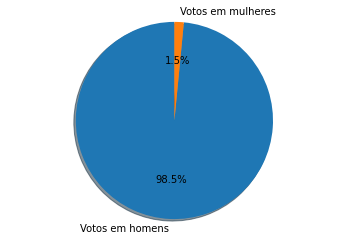

In [ ]:
labels = 'Votos em homens', 'Votos em mulheres'
sizes = [1149248245, 17896637]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# quanto R$ foi investido em mulheres?

In [ ]:
#buscar valores unicos dentro de uma coluna
candidatos_porcpf.groupby('DS_GENERO').sum()['VR_DESPESA_MAX_CAMPANHA']

DS_GENERO
FEMININO          9.662594e+09
MASCULINO         2.127020e+10
NÃO DIVULGÁVEL   -4.000000e+00
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

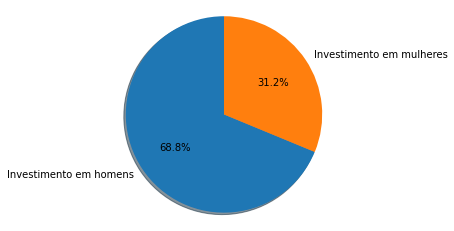

In [ ]:
labels = 'Investimento em homens', 'Investimento em mulheres'
sizes = [21270200, 9662594]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Os votos não divulgáveis não possuem valor estátisco

# Antes da lei, qual era o percentual de mulheres que se cadidataram a vereadoras? Vamos verificar a taxa de 2016

In [ ]:
candidatos_porcpf['DS_GENERO'].value_counts()

MASCULINO         302405
FEMININO          145128
NÃO DIVULGÁVEL         1
Name: DS_GENERO, dtype: int64

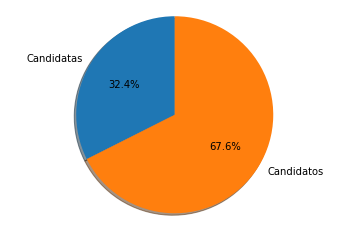

In [ ]:
labels = 'Candidatas', 'Candidatos'
sizes = [145128, 302405]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# **Para visualizar somente os vereadores eleitos:**

In [ ]:
#Verificar quais são as variaveis categoricas da coluna
candidatos_porcpf['DS_SIT_TOT_TURNO'].unique()

array(['ELEITO POR QP', 'SUPLENTE', 'ELEITO POR MÉDIA', 'NÃO ELEITO'],
      dtype=object)

In [ ]:
#Verificando a quantidade de municipios
len(candidatos_porcpf['NM_MUNICIPIO'].unique())

5294

In [ ]:
#Filtrrs somente os eleitos
vereadores_eleitos = candidatos_porcpf.query('DS_SIT_TOT_TURNO == "ELEITO POR QP" | DS_SIT_TOT_TURNO == "ELEITO POR MÉDIA"')
vereadores_eleitos

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,MASCULINO,3226138.77,301446
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,MASCULINO,3226138.77,107957
9679208761,9679208761,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,CARLOS NANTES BOLSONARO,PSC,MASCULINO,1399742.04,106657
02045962709,02045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCÍSIO MOTTA DE CARVALHO,PSOL,MASCULINO,1399742.04,90473
6511492826,6511492826,SÃO PAULO,71072,ELEITO POR QP,SP,JOSE REGINALDO NAZELO DE ALVARENGA TRIPOLI,PV,MASCULINO,3226138.77,88843
...,...,...,...,...,...,...,...,...,...,...
11122068840,11122068840,FLORÍNEA,64238,ELEITO POR QP,SP,ALTAIR CAMPANA,PSD,MASCULINO,10803.91,42
29989744149,29989744149,ARAGUAINHA,90239,ELEITO POR QP,MT,HERONIAS TEIXEIRA DE SOUZA,PSDB,MASCULINO,10803.91,41
09809530811,09809530811,UNIÃO PAULISTA,72150,ELEITO POR MÉDIA,SP,MILTON JOSÉ MARQUES AZEVEDO,DEM,MASCULINO,10803.91,40


In [ ]:
#Verificando quais variaveis estao dentro da coluna DS_GENERO
vereadores_eleitos['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [ ]:
vereadores_eleitos['DS_GENERO'].value_counts()

MASCULINO    50304
FEMININO      7794
Name: DS_GENERO, dtype: int64

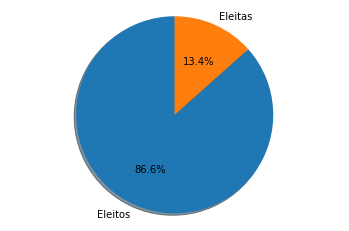

In [ ]:
labels = 'Eleitos', 'Eleitas'
sizes = [50304, 7794]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Verificando a taxa de sucesso na transformacao de recrutamento em cadeiras efetivas

In [ ]:
Cadidatas_16 = 145128
Eleitas_16 = 7794
sucesso_fem_2016 = Eleitas_16/Candidatas_16
sucesso_fem_2016

NameError: ignored

In [ ]:
Cadidatos_16 = 302405
Eleitos_16 = 50304
sucesso_mas_2016 = Eleitos_16/Candidatos_16
sucesso_mas_2016

6.0115497773536894

Em 2016, a taxa de sucesso de candidaturas masculinas foi 3 vezes maior do que a taxa de sucesso das mulheres

# Agrupar por cidade, contar quantas mulheres e quantos homens **eleitos**

In [ ]:
vereadores_cidade_16 = vereadores_eleitos.copy()
vereadores_cidade_16 = vereadores_eleitos.join(pd.get_dummies(vereadores_eleitos["DS_GENERO"])).drop(columns=["DS_GENERO"])
vereadores_cidade_16.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO
NR_CPF_CANDIDATO,,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,3226138.77,301446,0,1
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,3226138.77,107957,0,1
9679208761,9679208761,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,CARLOS NANTES BOLSONARO,PSC,1399742.04,106657,0,1
02045962709,02045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCÍSIO MOTTA DE CARVALHO,PSOL,1399742.04,90473,0,1
6511492826,6511492826,SÃO PAULO,71072,ELEITO POR QP,SP,JOSE REGINALDO NAZELO DE ALVARENGA TRIPOLI,PV,3226138.77,88843,0,1


In [ ]:
sum = vereadores_cidade_16['FEMININO'] + vereadores_cidade_16['MASCULINO']  # a Series
vereadores_cidade_16['TOTAL_ELEITOS'] = vereadores_cidade_16['FEMININO'] + vereadores_cidade_16['MASCULINO']  # assigned to a column
vereadores_cidade_16.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS
NR_CPF_CANDIDATO,,,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,3226138.77,301446,0,1,1
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,3226138.77,107957,0,1,1
9679208761,9679208761,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,CARLOS NANTES BOLSONARO,PSC,1399742.04,106657,0,1,1
02045962709,02045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCÍSIO MOTTA DE CARVALHO,PSOL,1399742.04,90473,0,1,1
6511492826,6511492826,SÃO PAULO,71072,ELEITO POR QP,SP,JOSE REGINALDO NAZELO DE ALVARENGA TRIPOLI,PV,3226138.77,88843,0,1,1


In [ ]:
vereadores_cidade_16 = vereadores_cidade_16.groupby(["CD_MUNICIPIO", "NM_MUNICIPIO"]).sum()
vereadores_cidade_16.head()

,,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS
CD_MUNICIPIO,NM_MUNICIPIO,,,,,
19,GUAJARÁ-MIRIM,118843.01,6226,0,11,11
35,PORTO VELHO,2826635.54,61581,4,18,22
51,JI-PARANÁ,791822.72,19571,2,14,16
78,ARIQUEMES,812193.54,20014,1,16,17
94,CACOAL,1066384.32,11709,1,11,12


In [ ]:
vereadores_cidade_16.to_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/vereadores_cidade_16.csv')

# Divisão do dataframe + exportar para csv para produção do mapa

In [ ]:
#Fatiamento do meu DF para criar o gráfico de dispersão no flourish
#vereadores_municipio[{'CD_MUNICIPIO', 'PORCENTAGEM DE MULHERES'}]

In [ ]:
#df_dispersao = vereadores_genero[{'CD_MUNICIPIO', 'PORCENTAGEM DE MULHERES'}]
#df_dispersao.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/df_dispersao.xlsx', index = False)

# **2020**

In [ ]:
candidatos_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/2020_consulta_cand_BRASIL.csv', sep = ';', encoding = 'ISO-8859-1')

In [ ]:
candidatos_2020 = candidatos_2020.filter(items=ColunasSociais)
candidatos_2020.head()

,NM_URNA_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO
0,TIM DA SAÚDE,AILTON DA SILVA MARQUES,7725667806,MASCULINO,18543.35,SUPLENTE
1,VINTE E CINCO,JOADES JOSE DA SILVA,7313157401,MASCULINO,18470.72,ELEITO POR QP
2,MINHA JOIA,JOSÉ FERNANDES ANTUNES DE SOUZA,83283510130,MASCULINO,12307.75,SUPLENTE
3,VALMIR LIMA,VALMIR FERREIRA DE LIMA,5136638435,MASCULINO,163049.65,SUPLENTE
4,WILSON DE CAMBUÍ,JOSE WILSON DE SOUZA,69494240510,MASCULINO,12307.75,SUPLENTE


In [ ]:
dados_combinados_2020 = pd.merge(dados_2020, candidatos_2020[['NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']], on='NM_CANDIDATO')
dados_combinados_2020

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO_x,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_URNA_CANDIDATO_y,NR_CPF_CANDIDATO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA
0,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,1,13,Vereador,10001014898,45666,LUCY CLEIDES CASSIANO DE ANDRADE,CLEIDE ANDRADE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,10000119769,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,70,CLEIDE ANDRADE,57704821253,FEMININO,135935.01
1,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,9,13,Vereador,10001014898,45666,LUCY CLEIDES CASSIANO DE ANDRADE,CLEIDE ANDRADE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,10000119769,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,18,CLEIDE ANDRADE,57704821253,FEMININO,135935.01
2,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,9,13,Vereador,10001014904,45444,ERICK BRANDÃO CONDE,ERICK CONDE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,10000119769,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,93,ERICK CONDE,1240348290,MASCULINO,135935.01
3,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,AC,1392,RIO BRANCO,1392,RIO BRANCO,1,13,Vereador,10001014904,45444,ERICK BRANDÃO CONDE,ERICK CONDE,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,10000119769,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,161,ERICK CONDE,1240348290,MASCULINO,135935.01
4,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,RO,493,ITAPUÃ DO OESTE,493,ITAPUÃ DO OESTE,2,13,Vereador,220000787056,33420,ALESSANDRA DA SILVA ESTEVÃO,ALESSANDRA ESTEVÃO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,33,PMN,Partido da Mobilização Nacional,220000076676,PARTIDO ISOLADO,PMN,5,SUPLENTE,N,18,ALESSANDRA ESTEVÃO,478586213,FEMININO,12307.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253006,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MA,8222,SANTANA DO MARANHÃO,8222,SANTANA DO MARANHÃO,51,13,Vereador,100001241294,22333,JOSE DOS SANTOS PEREIRA DA SILVA,ZE DOS SANTOS,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,22,PL,Partido Liberal,100000153633,PARTIDO ISOLADO,PL,2,ELEITO POR QP,N,375,ZE DOS SANTOS,84256567372,MASCULINO,16394.55
1253007,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,BA,35238,GANDU,35238,GANDU,151,13,Vereador,50001109042,10111,ADEUDES BULHOES DE OLIVEIRA,ADEUDES OLIVEIRA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,10,REPUBLICANOS,REPUBLICANOS,50000134471,PARTIDO ISOLADO,REPUBLICANOS,5,SUPLENTE,N,39,ADEUDES OLIVEIRA,26802635534,MASCULINO,12307.75
1253008,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,BA,35238,GANDU,35238,GANDU,151,13,Vereador,50001109043,10001,FABRICIO GUIMARÃES MOREIRA,FABRICIO MOREIRA,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,10,REPUBLICANOS,REPUBLICANOS,50000134471,PARTIDO ISOLADO,REPUBLICANOS,5,SUPLENTE,N,15,FABRICIO MOREIRA,92162584549,MASCULINO,12307.75
1253009,20/05/2021,13:15:02,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,BA,35238,GANDU,35238,GANDU,151,13,Vereador,50001109

In [ ]:
#Quero selecionar algumas colunas do dataframe gerado a partir da soma do df de resultados e do df de candidatos
ColunasQuero2020 = ['SG_UF', 'NM_MUNICIPIO', 'NM_CANDIDATO','NR_CPF_CANDIDATO','DS_CARGO', 'NM_URNA_CANDIDATO', 'SG_PARTIDO', 'DS_GENERO', 'QT_VOTOS_NOMINAIS','VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO','CD_MUNICIPIO']

dados_combinados_2020 = dados_combinados_2020.filter(items=ColunasQuero2020)
dados_combinados_2020.head()

,SG_UF,NM_MUNICIPIO,NM_CANDIDATO,NR_CPF_CANDIDATO,DS_CARGO,SG_PARTIDO,DS_GENERO,QT_VOTOS_NOMINAIS,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,CD_MUNICIPIO
0,AC,RIO BRANCO,LUCY CLEIDES CASSIANO DE ANDRADE,57704821253,Vereador,PSDB,FEMININO,70,135935.01,SUPLENTE,1392
1,AC,RIO BRANCO,LUCY CLEIDES CASSIANO DE ANDRADE,57704821253,Vereador,PSDB,FEMININO,18,135935.01,SUPLENTE,1392
2,AC,RIO BRANCO,ERICK BRANDÃO CONDE,1240348290,Vereador,PSDB,MASCULINO,93,135935.01,SUPLENTE,1392
3,AC,RIO BRANCO,ERICK BRANDÃO CONDE,1240348290,Vereador,PSDB,MASCULINO,161,135935.01,SUPLENTE,1392
4,RO,ITAPUÃ DO OESTE,ALESSANDRA DA SILVA ESTEVÃO,478586213,Vereador,PMN,FEMININO,18,12307.75,SUPLENTE,493


In [ ]:
candidatos_porcpf_20 = dados_combinados_2020[dados_combinados_2020['DS_CARGO']== 'Vereador']\
.groupby(['NR_CPF_CANDIDATO'])\
.agg({'NR_CPF_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'SG_UF' :'first', 'NM_CANDIDATO': 'first',
      'SG_PARTIDO' :'first', 'DS_GENERO': 'first', 'VR_DESPESA_MAX_CAMPANHA': 'first', 'QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['NR_CPF_CANDIDATO'],keep='first')

In [ ]:
candidatos_porcpf_20.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,MASCULINO,3675197.12,167552
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,MASCULINO,3675197.12,132716
24922395865,24922395865,SÃO PAULO,71072,ELEITO POR QP,SP,MARIO PALUMBO JUNIOR,MDB,MASCULINO,3675197.12,118395
35687945865,35687945865,SÃO PAULO,71072,ELEITO POR QP,SP,FELIPE BECARI COMENALE,PSD,MASCULINO,3675197.12,98717
2045962709,2045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCISIO MOTTA DE CARVALHO,PSOL,MASCULINO,1594577.38,86243


#  Quantidade de votos obtidos por gênero, contando os votos nos que se elegeram e nos que não foram eleitos

In [ ]:
candidatos_porcpf_20.groupby('DS_GENERO').sum()['QT_VOTOS_NOMINAIS']

DS_GENERO
FEMININO      20987575
MASCULINO    100856668
Name: QT_VOTOS_NOMINAIS, dtype: int64

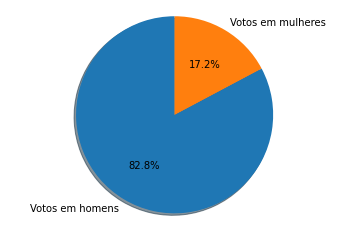

In [ ]:
labels = 'Votos em homens', 'Votos em mulheres'
sizes = [100856668, 20987575]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Os votos não divulgáveis não possuem valor estátisco

## Quanto R$ foi investido em mulheres?

In [ ]:
#buscar valores unicos dentro de uma coluna
candidatos_porcpf_20.groupby('DS_GENERO').sum()['VR_DESPESA_MAX_CAMPANHA']

DS_GENERO
FEMININO     1.335046e+10
MASCULINO    2.720999e+10
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

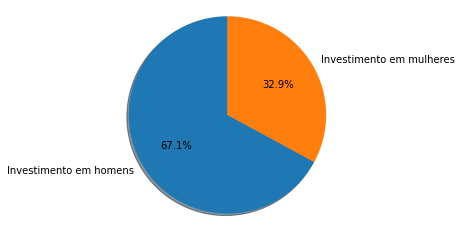

In [ ]:
labels = 'Investimento em homens', 'Investimento em mulheres'
sizes = [2720999, 1335046]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Os votos não divulgáveis não possuem valor estátisco

# Em 2020, qual foi o percentual de mulheres que se cadidataram a vereadora?


In [ ]:
candidatos_porcpf_20['DS_GENERO'].value_counts()

MASCULINO    317339
FEMININO     167126
Name: DS_GENERO, dtype: int64

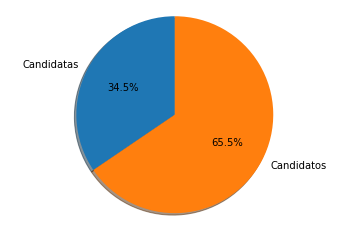

In [ ]:
labels = 'Candidatas', 'Candidatos'
sizes = [167126, 317339]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# **Para visualizar somente os vereadores eleitos:**

In [ ]:
vereadores_eleitos_20 = candidatos_porcpf_20.query('DS_SIT_TOT_TURNO == "ELEITO POR QP" | DS_SIT_TOT_TURNO == "ELEITO POR MÉDIA"')
vereadores_eleitos_20

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,DS_GENERO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS
NR_CPF_CANDIDATO,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,MASCULINO,3675197.12,167552
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,MASCULINO,3675197.12,132716
24922395865,24922395865,SÃO PAULO,71072,ELEITO POR QP,SP,MARIO PALUMBO JUNIOR,MDB,MASCULINO,3675197.12,118395
35687945865,35687945865,SÃO PAULO,71072,ELEITO POR QP,SP,FELIPE BECARI COMENALE,PSD,MASCULINO,3675197.12,98717
2045962709,2045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCISIO MOTTA DE CARVALHO,PSOL,MASCULINO,1594577.38,86243
...,...,...,...,...,...,...,...,...,...,...
1573370819,1573370819,BORÁ,62430,ELEITO POR QP,SP,ARTUR ROQUE CALDAS,PSDB,MASCULINO,12307.75,37
10627368930,10627368930,JAPIRA,76392,ELEITO POR MÉDIA,PR,VITOR HUGO CAMARGO DOS SANTOS,PTC,MASCULINO,12307.75,35
10953013650,10953013650,SÃO SEBASTIÃO DO RIO VERDE,52973,ELEITO POR MÉDIA,MG,JEFFERSON HERNANDO DA SILVA DINIZ,PSB,MASCULINO,12307.75,34


In [ ]:
vereadores_eleitos_20['DS_GENERO'].value_counts()

MASCULINO    47873
FEMININO      9128
Name: DS_GENERO, dtype: int64

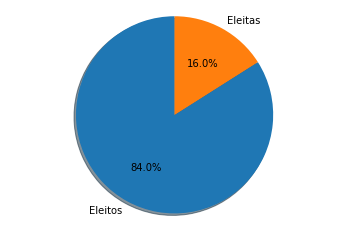

In [ ]:
labels = 'Eleitos', 'Eleitas'
sizes = [47873, 9128]
fig1, ax1 = plt.subplots ()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Verificando a taxa de sucesso na transformacao de recrutamento em cadeiras efetivas

In [ ]:
Cadidatas = 20987575
Eleitas = 9128
sucesso_fem_2020 = Eleitas/Candidatas
sucesso_fem_2020

NameError: ignored

In [ ]:
Cadidatos = 100856668
Eleitos = 47873
sucesso_mas_2020 = Eleitos/Candidatos
sucesso_mas_2020

NameError: ignored

Homens e mulheres tiveram **semelhante taxa de sucesso** na transformação de recrutamento em cadeiras efetivas apesar da enorme diferença de investimento nas candidaturas femininas em relação às masculinas

# Agrupar por cidade, contar quantas mulheres e quantos homens **eleitos**

In [ ]:
vereadores_cidade_20 = vereadores_eleitos_20.copy()
vereadores_cidade_20 = vereadores_eleitos_20.join(pd.get_dummies(vereadores_eleitos_20["DS_GENERO"])).drop(columns=["DS_GENERO"])
vereadores_cidade_20.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO
NR_CPF_CANDIDATO,,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,3675197.12,167552,0,1
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,3675197.12,132716,0,1
24922395865,24922395865,SÃO PAULO,71072,ELEITO POR QP,SP,MARIO PALUMBO JUNIOR,MDB,3675197.12,118395,0,1
35687945865,35687945865,SÃO PAULO,71072,ELEITO POR QP,SP,FELIPE BECARI COMENALE,PSD,3675197.12,98717,0,1
2045962709,2045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCISIO MOTTA DE CARVALHO,PSOL,1594577.38,86243,0,1


In [ ]:
sum = vereadores_cidade_20['FEMININO'] + vereadores_cidade_20['MASCULINO']  # a Series
vereadores_cidade_20['TOTAL_ELEITOS'] = vereadores_cidade_20['FEMININO'] + vereadores_cidade_20['MASCULINO']  # assigned to a column
vereadores_cidade_20.head()

,NR_CPF_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,SG_UF,NM_CANDIDATO,SG_PARTIDO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS
NR_CPF_CANDIDATO,,,,,,,,,,,,
5909198815,5909198815,SÃO PAULO,71072,ELEITO POR QP,SP,EDUARDO MATARAZZO SUPLICY,PT,3675197.12,167552,0,1,1
75515245849,75515245849,SÃO PAULO,71072,ELEITO POR QP,SP,MILTON LEITE DA SILVA,DEM,3675197.12,132716,0,1,1
24922395865,24922395865,SÃO PAULO,71072,ELEITO POR QP,SP,MARIO PALUMBO JUNIOR,MDB,3675197.12,118395,0,1,1
35687945865,35687945865,SÃO PAULO,71072,ELEITO POR QP,SP,FELIPE BECARI COMENALE,PSD,3675197.12,98717,0,1,1
2045962709,2045962709,RIO DE JANEIRO,60011,ELEITO POR QP,RJ,TARCISIO MOTTA DE CARVALHO,PSOL,1594577.38,86243,0,1,1


In [ ]:
vereadores_cidade_20 = vereadores_cidade_20.groupby(["CD_MUNICIPIO", "NM_MUNICIPIO"]).sum()
vereadores_cidade_20.head()

,,NR_CPF_CANDIDATO,VR_DESPESA_MAX_CAMPANHA,QT_VOTOS_NOMINAIS,FEMININO,MASCULINO,TOTAL_ELEITOS
CD_MUNICIPIO,NM_MUNICIPIO,,,,,,
19,GUAJARÁ-MIRIM,546642378026,172308.50,4585,0,14,14
35,PORTO VELHO,1183121680444,3377117.73,52062,2,21,23
51,JI-PARANÁ,837439139919,958416.99,15548,3,14,17
78,ARIQUEMES,640763727509,701275.08,11374,3,9,12
94,CACOAL,478052727287,1012348.60,7180,0,10,10


In [ ]:
vereadores_cidade_20.to_csv('/content/drive/MyDrive/Colab Notebooks/Pos_Eleicoes_2020/vereadores_cidade_20.csv')

# Comparando 2016 e 2020

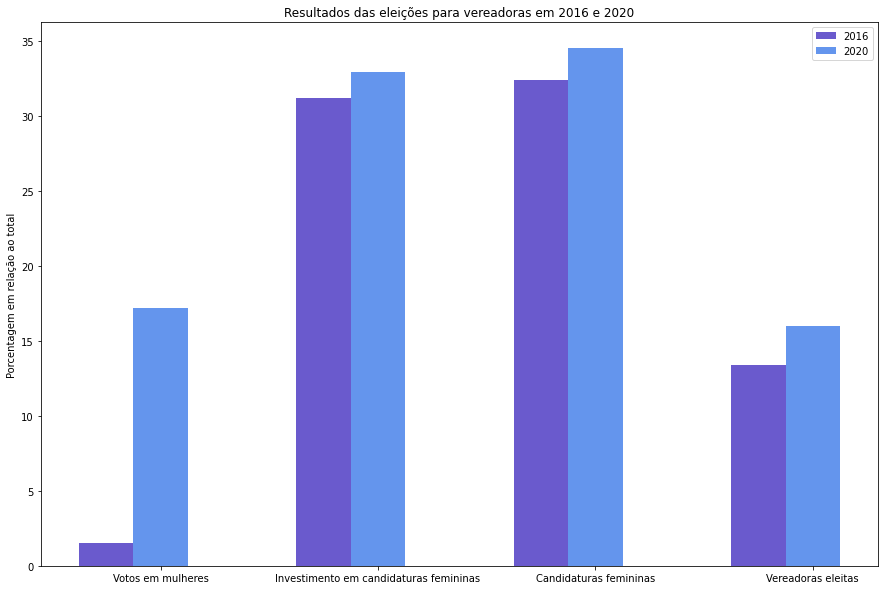

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados coletados do notebook
ano_2016 = [1.5, 31.2, 32.4, 13.4]
ano_2020 = [17.2, 32.9, 34.5, 16]
 

# Definindo a largura das barras
barWidth = 0.25

# Aumentando o gráfico
plt.figure(figsize=(15,10))

# Definindo a posição das barras
r1 = np.arange(len(ano_2016))
r2 = [x + barWidth for x in r1]
 
# Criando as barras
plt.bar(r1, ano_2016, color='#6A5ACD', width=barWidth, label='2016')
plt.bar(r2, ano_2020, color='#6495ED', width=barWidth, label='2020')
 
# Adiciando legendas as barras
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(ano_2016))], ['Votos em mulheres', 'Investimento em candidaturas femininas', 'Candidaturas femininas', 'Vereadoras eleitas'])
plt.ylabel('Porcentagem em relação ao total')
plt.title('Resultados das eleições para vereadoras em 2016 e 2020')
 
# Criando a legenda e exibindo o gráfico
plt.legend()
plt.show()